# Tarea 5
# Vázquez Hernández Carlos Iván
*las demostraciones estan el el pdf 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problema 1

(a) Escribe un programaque calcule la descomposicion LU de una matriz.

(b) Prueba tu programa claculando la descomposición LU de la matriz del sistema que abordamos en clase
\begin{equation}
    \begin{pmatrix}
        2 & 1 & 4 & 1\\
        3 & 4 & -1 & -1\\
        1 & -4 & 1 & 5\\
        2 & -2 & 1 & 1
    \end{pmatrix}
    \begin{pmatrix}
        w\\
        x\\
        y\\
        z\\
    \end{pmatrix}
    =
    \begin{pmatrix}
        -4\\
        3\\
        9\\
        7
    \end{pmatrix}
\end{equation}

(c) Multiplica las matrices $L$ y $U$ y verifica que se recupere la matriz original $A$

(d) Convierte tu programa en una funcion y usala para crear un programa completo para resolver el sistema de ecuaciones, realizando la backsustitution.

(e) Resuelve el mismo sistema usando la funcion solve del paquete numpy y verifica que obtengas la misma respuesta, para cualquier otro sistema que propongas.

In [18]:
#### Inciso (a),(b),(c) y (d)
### Hacemos la funcion completa de eliminacion gaussiana que nos de tambien L,U y el resultado del 
### sistema por backsustitution
def metodo_LU(matriz,v):
    ### Hacemos las copias de la matriz original y del vector v. U sera la forma reducida de A pero 
    ### con los valores de la diagonal diferentes de 1.
    A=matriz.copy()
    U=matriz.copy()
    V=v.copy()
    N=len(A)
    L=np.zeros([N,N],float)
    for m in range(N):
        #### dividimos por el elemento de la diagonal a la matriz original y al vector v.
        div=A[m,m]
        A[m,:] = A[m,:]/div
        V[m] = V[m]/div
        ### Aqui le asignamos a la diagonal de L los valores de 1
        L[m,m]=1
        ## restamos las filas de abajo a la matriz original, y al vector v
        for i in range(m+1,N):
            ### aqui gurdamos las operaciones realizadas a la matriz A en la matriz L
            L[i,m] = A[i,m]/div
            ## reducimos U igual que A pero sin dividir toda la fila por el pivote para 
            ## no multiplicar los elementos de la diagonal por su inverso y que la diagonal de U
            ## sea diferente de 1
            U[i,:] = U[i,:]-(U[i,m]/div)*U[m,:]
            V[i]=V[i]-(V[m]*A[i,m])
            A[i,:] = A[i,:]-(A[i,m])*A[m,:]
            ## Aqui hacemos las mismas operaciones al vector v

        ### Aqui hacemos la back sustitution
        x=np.zeros(N,float)
        ## corremos los indices al reves
        for m in range(N-1,-1,-1):
            x[m] = V[m]
            for i in range(m+1,N):
                x[m] = x[m]-(A[m,i]*x[i])
    return A,x,U,L

In [19]:
matriz=np.array([[2,1,4,1],
            [3,4,-1,-1],
            [1,-4,1,5],
            [2,-2,1,3]],float)
v=np.array([-4,3,9,7],float)
## calculamos lo que nos piden los incisos
matriz_r,solucion,U,L=metodo_LU(matriz,v)

print('La matriz original es:\n',matriz)
print('---------------------------')
print('La matriz L es:\n',L)
print('---------------------------')
print('La matriz U es:\n',U)
print('---------------------------')
print('---------------------------')
print('La mutiplicacion LU es:\n',np.dot(L,U))
print('---------------------------')
print('La solucion del sistema es:') 
print('w=',solucion[0])
print('x=',solucion[1])
print('y=',solucion[2])
print('z=',solucion[3])

La matriz original es:
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
---------------------------
La matriz L es:
 [[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
---------------------------
La matriz U es:
 [[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
---------------------------
---------------------------
La mutiplicacion LU es:
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
---------------------------
La solucion del sistema es:
w= 2.0000000000000036
x= -1.000000000000003
y= -2.0
z= 0.9999999999999964


Redondeando los valores de la solución debido a que python tiene un error en los números debido a como los alamcena, tenemos que $w=2,x=-1,y=-2,z=1$

(e) Si resolvemos el mismo sistema con la función solve, tenemos el resultado:

In [22]:
solucion_1=np.linalg.solve(matriz,v)
print(solucion_1)

[ 2. -1. -2.  1.]


# Problema 2

(b) Escribe un programa para evalar la expresión $H_{mn}$ con m y n arbitrarios, cuando la partícula en el pozo es un electrón, el pozo tiene un ancho de $5A$ y $a=10eV$ y la masa y la carga de un electron son $M=9.1094\times 10^{-31}$ y $q=1.6022\times 10^{-19}$

In [3]:
L=5e-10
a=10
M=9.1094e-31
h=6.582119569e-16
b=1.5023

def H_mn(m,n):
    #### tenemos que hacer tres casos para resolver la integral
    ### caso 1: si m=n
    if m==n:
        H=(b*n**2)+(a/2)
        return H
    elif m!=n:
        if m%2==0 and n%2==0:
            return 0
        elif m%2!=0 and n%2!=0:
            return 0
        elif m%2==0 and n%2!=0:
            H=-(8*a*m*n)/(np.pi**2*(m**2-n**2)**2)
            return H
        elif m%2!=0 and n%2==0:
            H=-(8*a*m*n)/(np.pi**2*(m**2-n**2)**2)
            return H

(c) Modifica el programa para crear un matriz de 10x10 de los elementos de H. Calcula los valores propios de esta matriz usando la funcion apropiada de la biblioteca numpy.linalg e imprime en electronvolts los primeros diez niveles de energía del pozo cuantico dentro de esta aproximación. 

In [4]:
### hacemos una matriz vacia
### y le agregamos su valores con dos ciclos for
H=np.zeros([10,10])
for m in range(10):
    for n in range(10):
        H[m,n]=H_mn(m+1,n+1)

### calculamos sus eigen valores
eigenvalores,eigenvectores = np.linalg.eig(H)
print(np.sort(eigenvalores))
print('La energía del estado fundamental es:',min(eigenvalores),'eV')

[  5.83385355  11.17390885  18.64665273  29.11516197  42.60962171
  59.11975917  78.6401816  101.16898864 126.70393508 155.3734367 ]
La energía del estado fundamental es: 5.83385355120786 eV


(d) Modifica tu programa para usar una matriz de 100 x 100 y calcula nuevamente los primeros diez valores propios de energía. Comparando con los valores que calculaste en el inciso (c) ¿qué concluyes sobre la precisión del cálculo?

In [5]:
### Hacemos la matriz de 100 x 100
H100=np.zeros([100,100])
for m in range(100):
    for n in range(100):
        H100[m,n]=H_mn(m+1,n+1)

eigenvalores100,eigenvectores100=np.linalg.eig(H100)
print('Los primeros diez eigenvalores son:\n',np.sort(eigenvalores100)[0:10])

Los primeros diez eigenvalores son:
 [  5.83385315  11.17390753  18.64665085  29.11515316  42.60961258
  59.11970652  78.64012971 101.16835689 126.70310107 155.24365787]


Las primeras cifras son iguales pero podemos ver que los eigenvalores estan calculados con mas precisión ya que las ultimas cifras si son diferentes.

(e)Modifica tu programa una vez mas para calcular la funcion de onda $\psi(x)$ para el estado fundamental y los dos primeros estados excitados del pozo. Utiliza tus resultados para hacer hacer una gráfica con tres curvas que muestren la densidad de porbabilidad $|\psi(x)|^{2}$ en funciónm de $x$ para cada uno de estos tres estados.
La función de onda debe satisfacer la condicón $\int_{0}^{L}|\psi(x)|^{2}dx=1$

In [170]:
### podemos escribir cualquier estado como una combinacion lineal de los coeficientes de este estado
### con el seno
### Los coeficientes yn ya los tenemos para cualqquier estado ya que son los coeficientes de
### los eigenvectores, 
def f2(x,n):
    return np.sin((np.pi*n*x)/(L))


def YN(n,eigenvalores,eigenvectores,a,b,N,f):
    ### definimod una lista vacía donde gaurdaremos nuestros valores de yn
    yn=[]
    ### Hacemos copias de los eigenvalores y los eigenvectores
    val=eigenvalores.copy()
    vec=eigenvectores.copy()
    ### obtenemos el indice del n-esimo valor de energia en la lista de eigenvalores para buscar
    ### su respectivo eigenvector con el indice, ya que la funcion .eig regresa la lista desordenada
    indice=val.tolist().index(np.sort(val)[n-1])
    ### Ya con el indice buscamos el respectivo eigenvector el cual es un vector de coeficientes
    coeficientes=vec[indice]
    ### hacemos un array de los valores x para los cuales vamos a obtener un valor de Yn(x)
    for i in np.linspace(a,b,N):
        y=0
        #### calculamos Yn(x) con la suma de coeficientes por la respectiva funcion
        ### para elegir el elemento de los coeficientes usamos n=0 ya que los indices corren desde 0
        ### pero para evaluar en la funcion usamo n+1 ya que no hay un nivel de energía 0
        for n in range(len(coeficientes)):
            y=y+(coeficientes[n]*f(i,n+1))
        yn.append(y)
    return np.array(yn)

Text(0.5, 0, 'x (metros)')

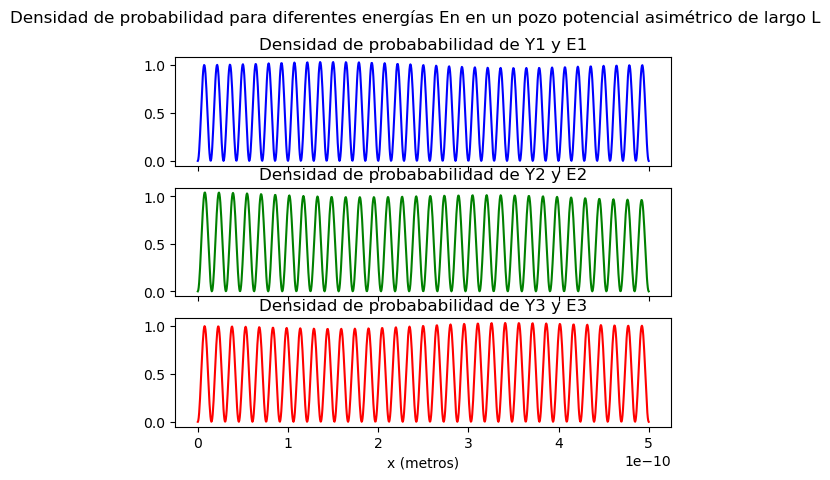

In [171]:
x=np.linspace(0,L,1000)
### calculamos los valores de las eigenfunciones
y1=YN(1,eigenvalores100,eigenvectores100,0,L,1000,f2)
y2=YN(2,eigenvalores100,eigenvectores100,0,L,1000,f2)
y3=YN(3,eigenvalores100,eigenvectores100,0,L,1000,f2)
### Ahora hay que calcular el valor de la funcion |Y(x)|² la cual es la densidad de probabilidad
### y podemos hacer un multipliacion elemento a elemento |Y(x)|²=Y(x)Y(x)
yp1=y1**2
yp2=y2**2
yp3=y3**2
## Graficamos
fig,(ax1,ax2,ax3) = plt.subplots(3,sharex=True)
fig.suptitle('Densidad de probabilidad para diferentes energías En en un pozo potencial asimétrico de largo L')
ax1.plot(x,yp1,color='blue')
ax1.set_title('Densidad de probababilidad de Y1 y E1')
ax2.plot(x,yp2,color='green')
ax2.set_title('Densidad de probababilidad de Y2 y E2')
ax3.plot(x,yp3,color='red')
ax3.set_title('Densidad de probababilidad de Y3 y E3')
ax3.set_xlabel('x (metros)')

In [172]:
#### Usamos uno de los metodos pasados de integracion para comprobar que las integrales son 1
### y que las soluciones etan normalizadas
def integral(f):
    dx=1/1000
    s=(f[0]+f[-1])/2
    for i in range(len(f)):
        s+=f[i]
    return 2*s*dx
#### haciendo una variacion del metodo del trapecio, las integrales son las siguientes
print(integral(yp1))
print(integral(yp2))
print(integral(yp3))

0.9990000000000002
0.9990000000000001
0.9990000000000002


# Problema 3

(a) Escribe un programa para resolver la ecuación $x=1-e^{-cx}$ para x, usando el método de relajacion para $c=2$, calcula la solución con una precisiṕon de al menos $10^{-6}$

In [173]:
def f3(x,c):
    return 1-np.exp(-c*x)

### Método de relajación
x0=1
for i in range(15):
    x=f3(x0,2)
    x0=x
    print('n =',i+1,'x =',x0)
    print('----------------------------')

n = 1 x = 0.8646647167633873
----------------------------
n = 2 x = 0.8225966691808597
----------------------------
n = 3 x = 0.8070247503317746
----------------------------
n = 4 x = 0.8009201942366403
----------------------------
n = 5 x = 0.7984747083247583
----------------------------
n = 6 x = 0.7974866394625985
----------------------------
n = 7 x = 0.797086049491047
----------------------------
n = 8 x = 0.796923413762181
----------------------------
n = 9 x = 0.7968573480008734
----------------------------
n = 10 x = 0.7968305046795713
----------------------------
n = 11 x = 0.7968195968986895
----------------------------
n = 12 x = 0.7968151643557075
----------------------------
n = 13 x = 0.7968133630966887
----------------------------
n = 14 x = 0.7968126311118457
----------------------------
n = 15 x = 0.7968123336514794
----------------------------


(b) Modifica tu programa para calcular la solución para valores de c de 0 a 3 en pasos de 0.01 y haz una gráfica de x en función de de c. Deberías ver una transición clara de un régimen en el que x=0 a un régimen en el que x es distinito de cero.

In [174]:
c=np.arange(0,3.01,0.01)
x_relajacion=[]
for i in c:
    x0=1
    for j in range(15):
        x=f3(x0,i)
        x0=x
    x_relajacion.append(x0)

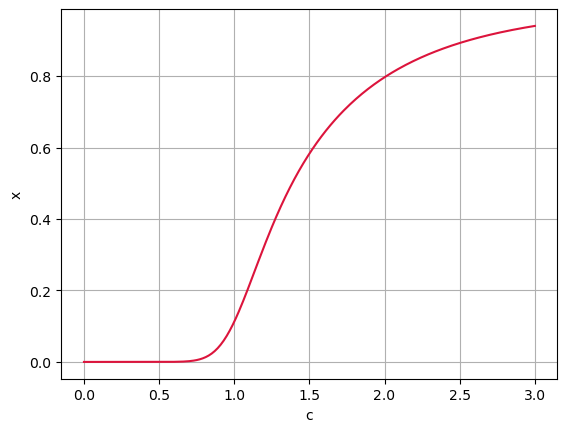

In [175]:
plt.plot(c,x_relajacion,color='crimson')
plt.xlabel('c')
plt.ylabel('x')
plt.grid(True)

# Problema 4

(b) Resuelve las siguientes ecuaciones, con el método de relajación, notaras que no se converge a una solución
\begin{align}
    x&=y(a+x^{2})\\
    y&=\frac{b}{a+x^{2}}\\
\end{align}

In [176]:
## metodo de relahacion para x=y(a+x²)
a=1
b=2
x0=1
y0=1

 
for i in range(70):
    y=b/(a+x0**2)
    x=y0*(a+x0**2)
    print('n=',i,'x=',x0,'y=',y0)
    print('----------------')
    x0=x
    y0=y

n= 0 x= 1 y= 1
----------------
n= 1 x= 2 y= 1.0
----------------
n= 2 x= 5.0 y= 0.4
----------------
n= 3 x= 10.4 y= 0.07692307692307693
----------------
n= 4 x= 8.396923076923079 y= 0.018321729571271525
----------------
n= 5 x= 1.310156049097899 y= 0.0279687745347386
----------------
n= 6 x= 0.0759774241902131 y= 0.7362390824073594
----------------
n= 7 x= 0.7404890733011719 y= 1.988521124626821
----------------
n= 8 x= 3.0788751163466825 y= 1.291719247766276
----------------
n= 9 x= 13.536535665652755 y= 0.19084931029197522
----------------
n= 10 x= 35.161656645088655 y= 0.010855535745562367
----------------
n= 11 x= 13.432011374622395 y= 0.0016163678607467738
----------------
n= 12 x= 0.2932397270847742 y= 0.011024207919000618
----------------
n= 13 x= 0.011972174459708588 y= 1.841638368385246
----------------
n= 14 x= 1.8419023358662185 y= 1.9997133751601999
----------------
n= 15 x= 8.783949400259472 y= 0.45531076832048456
----------------
n= 16 x= 35.58607297317904 y= 0.02558926

(c) Reordena las ecuaciones de tal forma que convergan a una solución con el método de relajación y que la solución coincide con el inciso (a)

Sean las ecuaciones reordenadas
\begin{align}
    x&=\sqrt{\frac{b}{y}-a}\\
    y&=\frac{x}{a+x^{2}}
\end{align}

In [177]:
a=1
b=2
x0=1
y0=1

 
for i in range(38):
    x=np.sqrt((b/y0)-a)
    x0=x
    y=x0/(a+x0**2)
    y0=y
    print('n=',i,'x=',x0,'y=',y0)
    print('----------------')

n= 0 x= 1.0 y= 0.5
----------------
n= 1 x= 1.7320508075688772 y= 0.43301270189221935
----------------
n= 2 x= 1.902314945932194 y= 0.4118632672940252
----------------
n= 3 x= 1.9636650714924069 y= 0.40438075610800917
----------------
n= 4 x= 1.9864122863201303 y= 0.40163345114218674
----------------
n= 5 x= 1.9949097477571613 y= 0.400611243354449
----------------
n= 6 x= 1.9980918687165672 y= 0.4002290339314792
----------------
n= 7 x= 1.9992845505793713 y= 0.40008586211625663
----------------
n= 8 x= 1.9997317204769791 y= 0.40003219469412865
----------------
n= 9 x= 1.9998993971476058 y= 0.40001207250421084
----------------
n= 10 x= 1.9999622742071335 y= 0.4000045271179152
----------------
n= 11 x= 1.9999858528665935 y= 0.400001697659211
----------------
n= 12 x= 1.9999946948304455 y= 0.4000006366207968
----------------
n= 13 x= 1.9999980105621868 y= 0.40000023873260093
----------------
n= 14 x= 1.9999992539609281 y= 0.40000008952469757
----------------
n= 15 x= 1.9999997202353632 y=

con esta nueva reordenación, coincidimos con la solución analítica donde $x=b=2$ y $y=0.4$

# Problema 5

\begin{equation}
    I(\lambda)=\frac{2\pi hc^{2}\lambda^{-5}}{e^{hc/\lambda k_{B}T}-1}
    \end{equation}

(b) La ecuación no lineal es $5e^{-x}+x-5=0$, escribe un programa para resolver esta ecuacion con una presicion de $\epsilon=10^{-6}$ usando el metodo de busqueda binaria y así, encuentra un valor para la constante de desplazamineto.

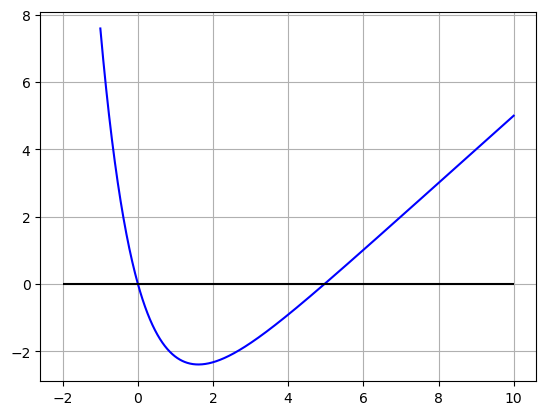

In [2]:
### primero graficamos la funcion para obtener una idea de los puntos donde podemos encontrar el cero.
def f5(x):
    return 5*np.exp(-x)+x-5
    
x=np.linspace(-1,10,1000)
plt.plot(x,f5(x),color='blue')
plt.hlines(y=0,xmin=-2,xmax=10,color='black')
plt.grid(True)

In [5]:
#### Hacemos el programa para el metódo de bisección
def biseccion(f,a,b,N):
    p=0
    x0=a+(b-a)/2
    f1=f(x0)
    if f1==0:
        return f1
    else:
        while p < N:
            if f1*f(a) > 0:
                a=x0
                x0=a+(b-a)/2
                f1=f(x0)
            elif f1*f(a) < 0:
                b=x0
                x0=b-(b-a)/2
                f1=f(x0)
            p=p+1
    return x0

In [6]:
print('primera raiz, x=',biseccion(f5,-1,1,100))
print('segunda raiz, x=',biseccion(f5,4,6,100))

primera raiz, x= 0.0
segunda raiz, x= 4.965114231744276


La constante de desplazamiento de Wien es:
\begin{equation}
    b=\frac{hc}{K_Bx}
\end{equation}
Con x la solución de la ecuación lineal, por lo que $x=0$ no puede ser solucion, entonces tomamos $x=4.96$

In [14]:
### la constante de desplazamiento es:
h=6.62607015e-34
k=1.380649e-23
c=3e8
b=h*c/(k*4.96)
print('La constante de desplazamiento es b=',b,'mk')

La constante de desplazamiento es b= 0.0029027679879231176 mk


(c) El pico de longitud de onda en la radiación emitida por el sol cae en $\lambda=502nm$. A partir de las ecuaciones anteriores y el valor de la constante de desplazamiento, estima la temperatura de la superficie del sol.

In [15]:
print('La temperatura del sol es T=',b/502e-9,'k')

La temperatura del sol es T= 5782.406350444457 k


# Problema 6

(b) Has un programa utilizando el método de Newton para resolver la ecuacion la distancia r desde la Tierra hasta el punto $L_1$
\begin{equation}
    \frac{GM}{r^{2}}-\frac{GM}{(R-r)^{2}}=\omega^{2}r
\end{equation}
con
\begin{align}
    G&=6.674\times 10^{-11}m^{3}kg^{-1}s^{-2}\\
    M&=5.974\times 10^{24}kg\\
    m&=7.348\times 10^{22}kg\\
    R&=3.844\times 10^{8}m\\
    \omega&=2.662\times 10^{-6}s^{-1}
\end{align}

In [22]:
### Graficamos la funcion para darnos una idea de donde podria estar el cero
G=6.674e-11
M=5.974e24
m=7.348e22
R=3.844e8
w=2.662e-6

def lagrange(x):
    return (G*M/(x**2))-(G*m/((R-x)**2))-(x*w**2)
def d_lagrange(x):
    return (-2*G*M/x**3)-(2*G*m/(R-x)**3)-w**2
    
def Newton(f,df,x0,N):
    n=0
    while n<N:
        x=x0-(f(x0)/df(x0))
        x0=x
        n+=1
    return x

In [24]:
print('La distancia r de la Tierra al punto L1 es:',Newton(lagrange,d_lagrange,10000,100))

La distancia r de la Tierra al punto L1 es: 326045071.66535544


Resolviendo la ecución para $r$ vemos que la distancia de la tierra al punto de Lagrange es $326,045,071.66m=326,045.071km$